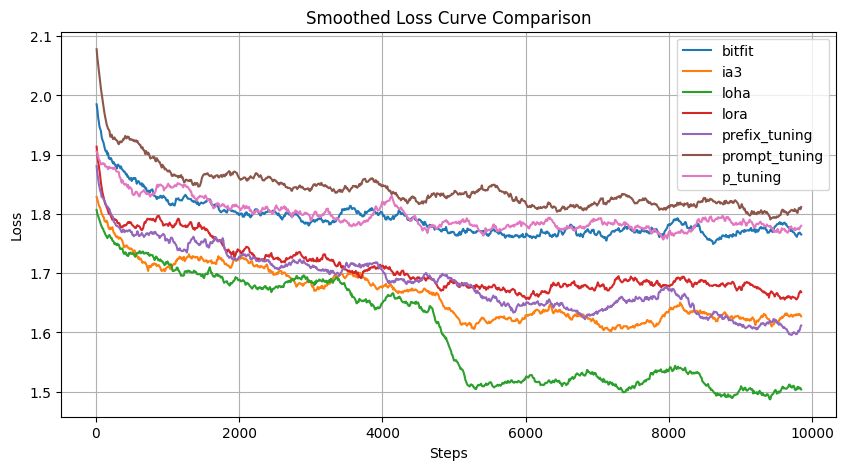

In [23]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

def read_losses(file_path):
    with open(file_path, 'r') as file:
        data = file.readlines()
    
    steps = []
    losses = []
    for line in data:
        step, loss = line.split(':')
        steps.append(int(step.strip()))
        losses.append(float(loss.strip()))
    return steps, losses

def moving_average(data, window_size=50):
    # pad = np.full(window_size // 2, data[0])
    # pad1 = np.full(window_size // 2, data[-1])
    # data_padded = np.concatenate([pad, data, pad1])
    window = np.ones(window_size) / window_size
    smoothed_data = np.convolve(data, window, mode='full')[:-window_size+1]
    smoothed_data = smoothed_data[window_size:]
    return smoothed_data


def plot_losses(root_folder):
    file_paths = glob.glob(os.path.join(root_folder, '**/10_epochs_train_losses.txt'), recursive=True)
    
    plt.figure(figsize=(10, 5))
    for path in file_paths:
        steps, losses = read_losses(path)
        window_size = 50
        steps = steps[:-window_size]
        losses_smooth = moving_average(losses, window_size)
        plt.plot(steps, losses_smooth, label=os.path.basename(os.path.dirname(path)))
    
    plt.xlabel('Steps')
    plt.ylabel('Loss')
    plt.title('Smoothed Loss Curve Comparison')
    plt.legend()
    plt.grid(True)
    plt.show()

root_folder = './'
plot_losses(root_folder)



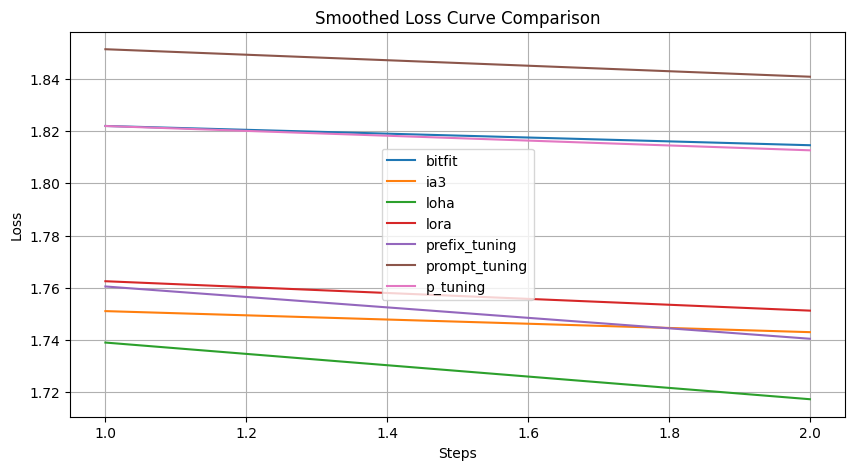

In [12]:
def read_losses(file_path):
    steps = []
    losses = []
    with open(file_path, 'r') as file:
        data = file.readlines()
    for line in data:
        step, loss = line.split(':')
        steps.append(int(float(step.strip())))  # Convert to float first, then to int
        losses.append(float(loss.strip()))
    return steps, losses


def plot_losses(root_folder):
    file_paths = glob.glob(os.path.join(root_folder, '**/10_epochs_eval_losses.txt'), recursive=True)
    
    plt.figure(figsize=(10, 5))
    for path in file_paths:
        steps, losses = read_losses(path)
        plt.plot(steps, losses, label=os.path.basename(os.path.dirname(path)))
        # steps_smooth, losses_smooth = smooth_curve(steps, losses)
        # plt.plot(steps_smooth, losses_smooth, label=os.path.basename(os.path.dirname(path)))
    
    plt.xlabel('Steps')
    plt.ylabel('Loss')
    plt.title('Smoothed Loss Curve Comparison')
    plt.legend()
    plt.grid(True)
    plt.show()

root_folder = './'
plot_losses(root_folder)